##Cleaning

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# loading the Titanic dataset into a Pandas DataFrame
titanic_data = pd.read_csv('Titanic-Dataset.csv')

# displaying the first few rows of the dataset to understand its structure
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
# checking for missing values in the dataset
print(titanic_data.isnull().sum())



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [21]:
# handling missing values
#filling missing 'Age' values with the median age
median_age = titanic_data['Age'].median()
titanic_data['Age'].fillna(median_age, inplace=True)

In [22]:
#Dropping irrelevant columns (e.g., 'PassengerId', 'Name', 'Ticket', 'Cabin' might not be necessary for analysis)
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


In [24]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


##Data Exploration and Visualization


In [38]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [40]:
print('Dimension:',titanic_data.ndim)
print('-------------------')
print('Shape:',titanic_data.shape)
print('-------------------')
print('Index:',titanic_data.index)
print('-------------------')
print('Columns:',titanic_data.columns)
print('-------------------')
print('Dtype:',titanic_data.dtypes)

Dimension: 2
-------------------
Shape: (891, 8)
-------------------
Index: RangeIndex(start=0, stop=891, step=1)
-------------------
Columns: Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
-------------------
Dtype: Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


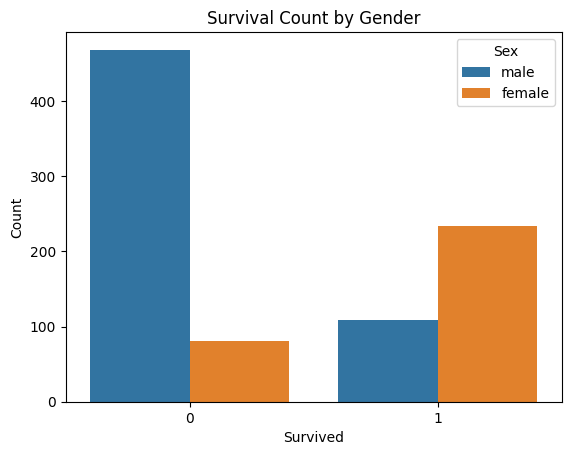

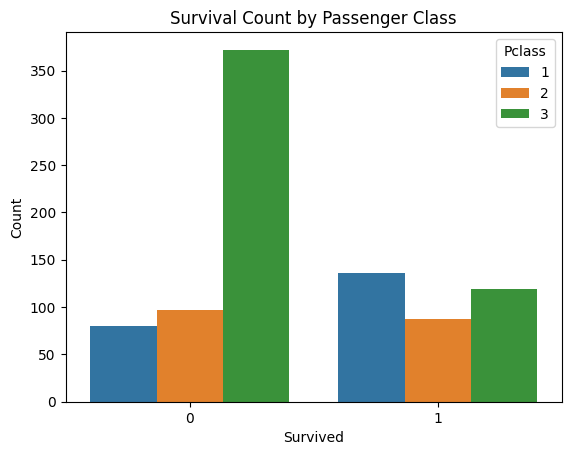

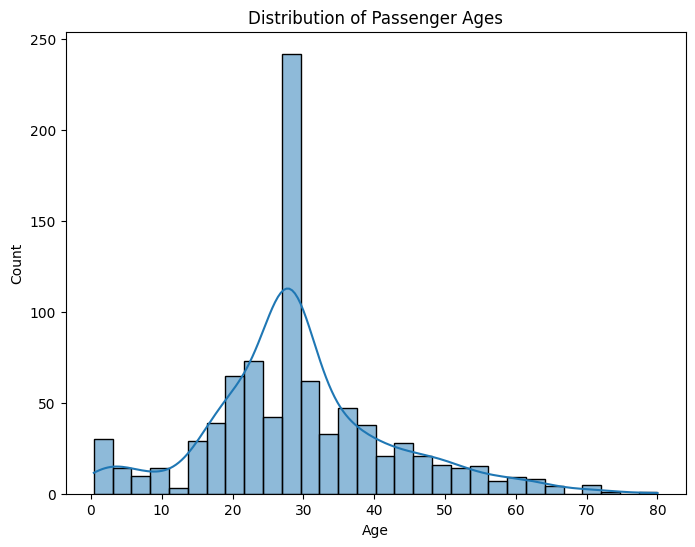

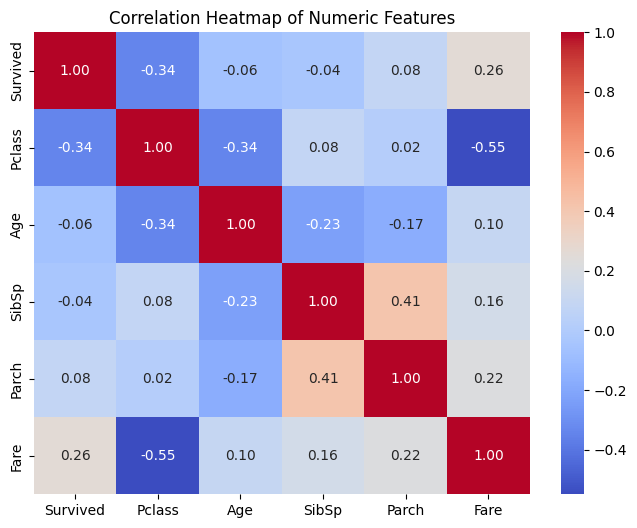

In [25]:
# exploring survival rates by gender
sns.countplot(x='Survived', hue='Sex', data=titanic_data)
plt.title('Survival Count by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# visualizing survival rates by passenger class
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# plotting the distribution of passenger ages
plt.figure(figsize=(8, 6))
sns.histplot(titanic_data['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# generating a correlation heatmap of numeric features
numeric_features = titanic_data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

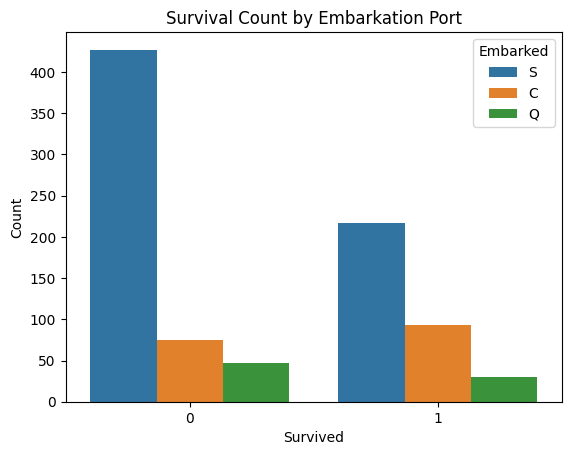

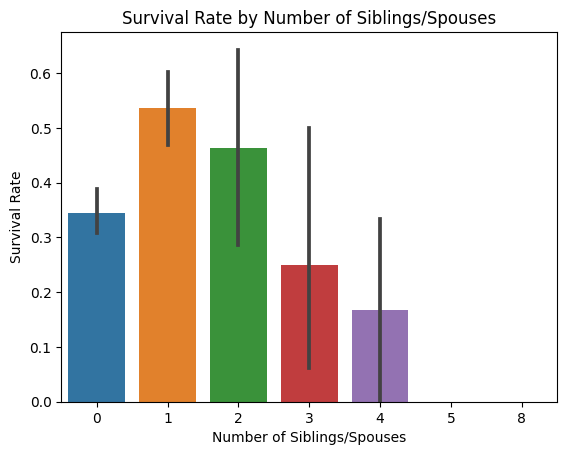

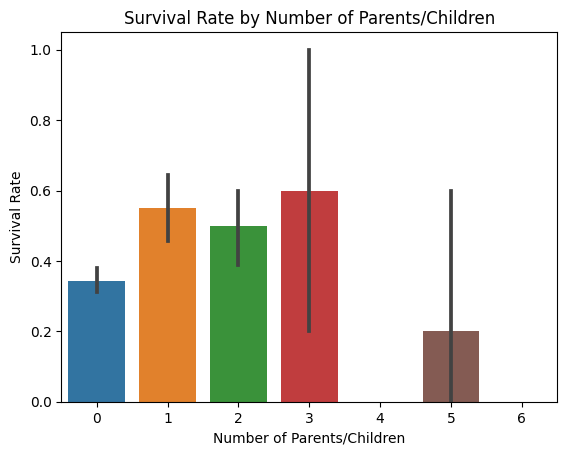

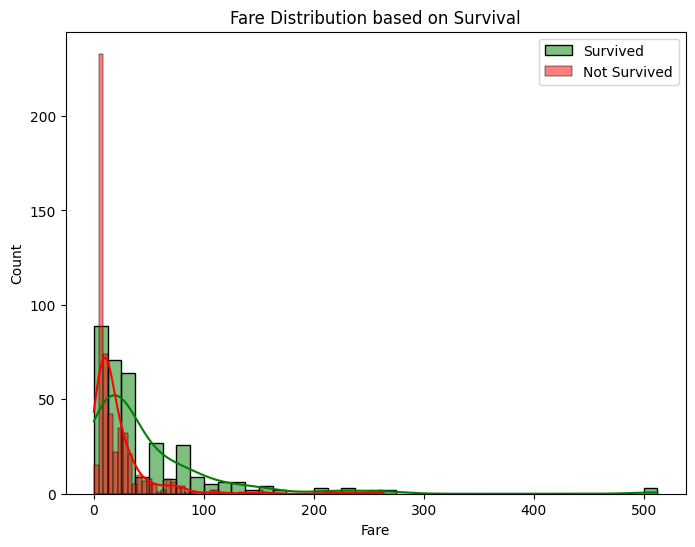

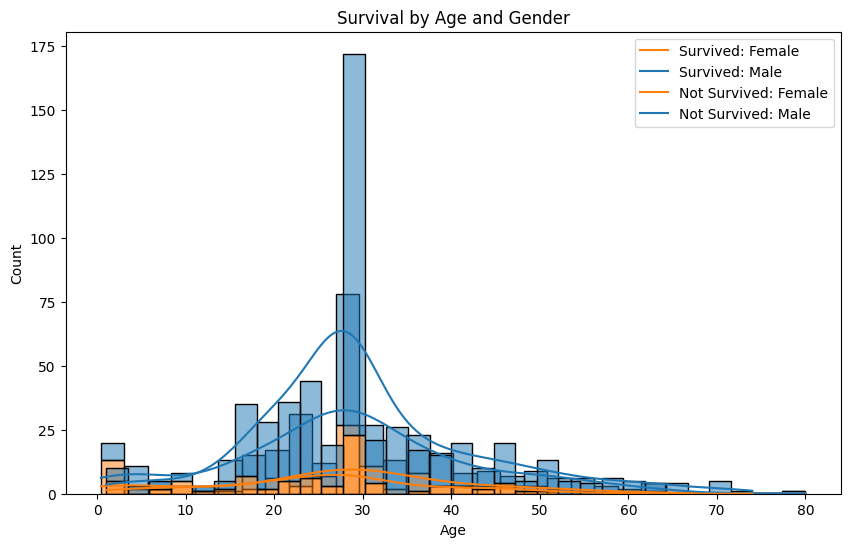

In [36]:
# exploring survival rates by embarkation port
sns.countplot(x='Survived', hue='Embarked', data=titanic_data)
plt.title('Survival Count by Embarkation Port')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# visualizing survival rates by number of siblings/spouses
sns.barplot(x='SibSp', y='Survived', data=titanic_data)
plt.title('Survival Rate by Number of Siblings/Spouses')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')
plt.show()

# visualizing survival rates by number of parents/children
sns.barplot(x='Parch', y='Survived', data=titanic_data)
plt.title('Survival Rate by Number of Parents/Children')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Survival Rate')
plt.show()

#Analyzing fare distribution based on survival status
plt.figure(figsize=(8, 6))
sns.histplot(titanic_data[titanic_data['Survived'] == 1]['Fare'], color='green', kde=True, label='Survived')
sns.histplot(titanic_data[titanic_data['Survived'] == 0]['Fare'], color='red', kde=True, label='Not Survived')
plt.title('Fare Distribution based on Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()
plt.show()

#Visualize survival rates by age and gender
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='Sex', bins=30, multiple='stack', data=titanic_data[titanic_data['Survived'] == 1], kde=True)
sns.histplot(x='Age', hue='Sex', bins=30, multiple='stack', data=titanic_data[titanic_data['Survived'] == 0], kde=True)
plt.title('Survival by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Survived: Female', 'Survived: Male', 'Not Survived: Female', 'Not Survived: Male'])
plt.show()


##Questions

1. How many Males and Females were on board the titanic

In [27]:
gender_count = titanic_data['Sex'].value_counts()
gender_count

male      577
female    314
Name: Sex, dtype: int64

2. Number of passengers embarking from each Port of titanic

In [28]:
embarkation_count = titanic_data['Embarked'].value_counts()
embarkation_count

S    644
C    168
Q     77
Name: Embarked, dtype: int64

3. Survival rate comparison between different passenger classes

In [29]:
survival_rate_by_class = titanic_data.groupby('Pclass')['Survived'].mean()
survival_rate_by_class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

4. Impact of having Siblings and Spouses on Survival Chance

In [30]:
survival_with_sibsp = titanic_data.groupby('SibSp')['Survived'].mean()
survival_with_sibsp

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

5. Impact of having Children and Grandparents on Suvival Chance

In [31]:
survival_with_parch = titanic_data.groupby('Parch')['Survived'].mean()
survival_with_parch

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

6. Correlation between age groups and survival rates among passengers


In [32]:
survival_by_age_group = titanic_data.groupby(pd.cut(titanic_data['Age'], bins=[0, 18, 30, 50, 100]))['Survived'].mean()
survival_by_age_group

Age
(0, 18]      0.503597
(18, 30]     0.331096
(30, 50]     0.423237
(50, 100]    0.343750
Name: Survived, dtype: float64

7. Influence of the port from which passengers embarked on survival chances

In [33]:
survival_by_port = titanic_data.groupby('Embarked')['Survived'].mean()
survival_by_port

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

8. Any possible vairation in Fare for survived passengers?

In [34]:
fare_variation_by_survival = titanic_data.groupby('Survived')['Fare'].mean()
fare_variation_by_survival

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

9. What was the overall Survival rate among passengers?

In [35]:
overall_survival_rate = titanic_data['Survived'].mean()
overall_survival_rate

0.3838383838383838

##Insights

- Gender Distribution:

There were 577 males and 314 females onboard the Titanic. This indicates a notable gender imbalance, with a significantly higher number of males compared to females.


- Passengers Embarking from Each Port:

The count of passengers embarking from each port was as follows:

Southampton (S): 644

Cherbourg (C): 168

Queenstown (Q): 77

Southampton had the highest number of embarked passengers, followed by Cherbourg and then Queenstown.


- Survival Rate by Passenger Class:

The survival rates for different passenger classes were:

Class 1: 62.96%

Class 2: 47.28%

Class 3: 24.24%

Passengers in higher classes (1st class) had notably higher survival rates compared to lower classes.


- Impact of Siblings/Spouses on Survival:

The survival rates based on the number of siblings/spouses were:

0 Siblings/Spouses: 34.54%

1 Sibling/Spouse: 53.59%

2 Siblings/Spouses: 46.43%

3 Siblings/Spouses: 25.00%

4 Siblings/Spouses: 16.67%

5 Siblings/Spouses: 0.00%

8 Siblings/Spouses: 0.00%

Passengers with 1 or 2 siblings/spouses had higher survival rates compared to others.


- Impact of Parents/Children on Survival:

The survival rates based on the number of parents/children were:

0 Parents/Children: 34.37%

1 Parent/Child: 55.08%

2 Parents/Children: 50.00%

3 Parents/Children: 60.00%

4 Parents/Children: 0.00%

5 Parents/Children: 20.00%

6 Parents/Children: 0.00%

Passengers with 1 to 3 parents/children had higher survival rates.

- Survival Rates by Age Group:

The survival rates among different age groups were:

Age 0-18: 50.36%

Age 18-30: 33.11%

Age 30-50: 42.32%

Age 50-100: 34.38%

Children (0-18) had a slightly higher survival rate compared to other age groups.

- Influence of Embarkation Port on Survival:

The survival rates based on the port of embarkation were:

Cherbourg (C): 55.36%

Queenstown (Q): 38.96%

Southampton (S): 33.70%

Passengers embarking from Cherbourg had the highest survival rate.

- Fare Variation for Survived Passengers:

Survived passengers had a higher average fare of 48.40 compared to non-survivors, who had an average fare of 22.12.

- Overall Survival Rate:

The overall survival rate among passengers onboard the Titanic was approximately 38.38%.

##Story

Unveiling Titanic's Survival Patterns: A Comprehensive Analysis

The voyage of the RMS Titanic, steeped in tragedy, offers a unique lens into the lives and survival stories of its passengers. Analyzing the dataset provides profound insights into various factors that influenced survival rates and sheds light on the intricate dynamics at play during the catastrophic event.

Gender Disparity: A Profound Impact on Survival

The gender imbalance among the passengers was starkly apparent—a total of 577 males and 314 females. This imbalance, while merely numerical, held profound implications for survival. While the dataset highlights the higher count of males onboard, it also signifies the implications for evacuation and rescue efforts. The larger number of males might have impacted the overall survival statistics, potentially affecting the outcomes in terms of rescue prioritization, access to lifeboats, and the societal norms guiding evacuation procedures during the early 20th century.

Embarkation Ports: Insights into Demographics and Survival Rates

Delving deeper into the embarkation count across different ports—Southampton, Cherbourg, and Queenstown—unveils intriguing patterns. Southampton saw the highest count of embarked passengers, tallying up to 644 individuals. In contrast, Cherbourg and Queenstown registered 168 and 77 passengers, respectively. The variance in embarkation counts potentially reflects distinct demographic profiles, socio-economic disparities, and perhaps differing motivations for undertaking the voyage. Additionally, a noteworthy observation emerges when correlating the port of embarkation with survival rates. Passengers embarking from Cherbourg exhibited a notably higher survival rate at 55.36% compared to Queenstown (38.96%) and Southampton (33.70%). This variance potentially hints at socio-economic differences or could reflect the placement of cabins or rooms on the ship concerning the embarkation ports, affecting the proximity to lifeboats or evacuation routes.

Class Divide: Socio-Economic Status and Survival Realities

One of the most profound insights gleaned from the dataset is the significant influence of passenger class on survival rates. The divide among first, second, and third-class passengers painted a picture of stark disparities in survival. First-class passengers enjoyed a notably higher survival rate of 62.96%, underscoring the possible privilege associated with higher classes. In stark contrast, third-class passengers faced grim odds, with a survival rate of merely 24.24%. The class dynamics during the evacuation likely played a pivotal role, with factors such as proximity to lifeboats, access to information, and assistance during the chaos contributing to the varying survival rates among different classes.

Family Bonds and Survival Strategies

The dataset reveals intriguing patterns concerning family units and their influence on survival. Passengers accompanied by one or two siblings/spouses or one to three parents/children displayed notably higher survival rates. The emphasis on saving family units during the evacuation process becomes apparent through these statistics. The act of sticking together and assisting each other might have played a pivotal role in ensuring higher survival rates among these groups.

Age as a Determinant of Survival

Age groups provide nuanced insights into the survival realities onboard the Titanic. Children aged 0-18 displayed a slightly higher survival rate of 50.36%, potentially indicating a priority for saving the young during the evacuation. Other age groups, ranging from 18 to 50 years and above, faced survival rates ranging from 33% to 42%, highlighting the challenges and difficulties encountered by different age brackets during the evacuation process. The age factor likely played a role in evacuation priorities and physical capabilities to navigate the chaos.

Fare Variations: Economic Disparities and Survival Chances

Another intriguing facet illuminated by the dataset is the variation in fares paid by survivors and non-survivors. Survivors paid a significantly higher average fare of 48.40, nearly double the fare paid by non-survivors (22.12). This substantial disparity might signify a correlation between financial status and survival chances. It hints at the possibility that individuals of higher economic standing might have had better access to resources, accommodations, or even information during the evacuation process, potentially influencing their survival outcomes.

Overall Survival: A Collective Narrative of Fate

In totality, the dataset encapsulates the collective fate of all passengers aboard the Titanic, unveiling an overall survival rate of approximately 38.38%. This overarching statistic tells the story of the catastrophic event, encompassing the diverse experiences, challenges, and eventual outcomes of individuals from varying backgrounds, ages, classes, and embarkation ports.

This narrative aims to delve deeper into each aspect of the titanic dataset's insights, providing a comprehensive analysis of the factors influencing survival aboard the Titanic.